Housing Prices Competition for Kaggle Learn Users

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Getting train data

In [8]:
data_train = pd.read_csv('train.csv')
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Getting test data

In [9]:
data_test = pd.read_csv('train.csv')
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Checking how many the Nan values in each columns

In [11]:
data_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Checking the unique data in a columns

In [13]:
data_train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Checking what inside the column to see if it have correlation to sale price

In [14]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

taking SalePrice as target value

In [15]:
y = data_train.SalePrice

Taking YrSold, GarageArea, LotArea, LandContour, YearBuilt, Foundation, OverallQual, OverallCond, Street, Functional, Bedroom and changing their name for minimize the mistake 

In [21]:
feature_to_test = ["YrSold", "GarageArea", "LotArea", "LandContour", 
    "YearBuilt", "Foundation",  "OverallQual", "OverallCond", 
    "Street", "Functional", "BedroomAbvGr"]

real_name = {
    "YrSold": "Year Sold",
    "GarageArea": "Garage Area",
    "LotArea": "Area in square feet",
    "LandContour": "Flatness of the property",
    "YearBuilt": "Original construction date",
    "Foundation": "Type of foundation",
    "OverallQual": "Overall material and finish quality",
    "OverallCond": "Overall condition rating",
    "Street": "Type of road access",
    "Functional": "Home functionality rating",
    "BedroomAbvGr": "Bedrooms above ground (does NOT include basement bedrooms)"
}

data_train.rename(columns=real_name, inplace=True)
data_train


Id  MSSubClass MSZoning  LotFrontage  Area in square feet  \
0        1          60       RL         65.0                 8450   
1        2          20       RL         80.0                 9600   
2        3          60       RL         68.0                11250   
3        4          70       RL         60.0                 9550   
4        5          60       RL         84.0                14260   
...    ...         ...      ...          ...                  ...   
1455  1456          60       RL         62.0                 7917   
1456  1457          20       RL         85.0                13175   
1457  1458          70       RL         66.0                 9042   
1458  1459          20       RL         68.0                 9717   
1459  1460          20       RL         75.0                 9937   

     Type of road access Alley LotShape Flatness of the property Utilities  \
0                   Pave   NaN      Reg                      Lvl    AllPub   
1                   Pave   NaN      Reg                      Lvl    AllPub   
2                   Pave   NaN      IR1                      Lvl    AllPub   
3                   Pave   NaN      IR1                      Lvl    AllPub   
4                   Pave   NaN      IR1                      Lvl    AllPub   
...                  ...   ...      ...                      ...       ...   
1455                Pave   NaN      Reg                      Lvl    AllPub   
1456                Pave   NaN      Reg                      Lvl    AllPub   
1457                Pave   NaN      Reg                      Lvl    AllPub   
1458                Pave   NaN      Reg                      Lvl    AllPub   
1459                Pave   NaN      Reg                      Lvl    AllPub   

      ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold Year Sold  \
0     ...        0    NaN    NaN         NaN       0      2      2008   
1     ...        0    NaN    NaN         NaN       0      5      2007   
2     ...        0    NaN    NaN         NaN       0      9      2008   
3     ...        0    NaN    NaN         NaN       0      2      2006   
4     ...        0    NaN    NaN         NaN       0     12      2008   
...   ...      ...    ...    ...         ...     ...    ...       ...   
1455  ...        0    NaN    NaN         NaN       0      8      2007   
1456  ...        0    NaN  MnPrv         NaN       0      2      2010   
1457  ...        0    NaN  GdPrv        Shed    2500      5      2010   
1458  ...        0    NaN    NaN         NaN       0      4      2010   
1459  ...        0    NaN    NaN         NaN       0      6      2008   

      SaleType  SaleCondition  SalePrice  
0           WD         Normal     208500  
1           WD         Normal     181500  
2           WD         Normal     223500  
3           WD        Abnorml     140000  
4           WD         Normal     250000  
...        ...            ...        ...  
1455        WD         Normal     175000  
1456        WD         Normal     210000  
1457        WD         Normal     266500  
1458        WD         Normal     142125  
1459        WD         Normal     147500  

[1460 rows x 81 columns]

Convert value in column to numeric

In [42]:
data_train['Flatness of the property'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: Flatness of the property, dtype: int64

Lvl to 1, Bnk to 2 , HLS to 3, Low to 4

In [43]:
flatness = {
    'Lvl':1,
    'Bnk':2,
    'HLS':3,
    'Low':4
}

In [44]:
data_train['Flatness of the property'] = data_train['Flatness of the property'].map(flatness)

Converting Type of foundation to numeric

In [48]:
data_train['Type of foundation'].value_counts()

1    647
2    634
3    146
4     24
5      6
6      3
Name: Type of foundation, dtype: int64

PConc to 1, CBlock to 2, BrkTil to 3, Slab to 4, Stone to 5, Wood to 6

In [46]:
mapping = {
    'PConc': 1,
    'CBlock': 2,
    'BrkTil': 3,
    'Slab': 4,
    'Stone': 5,
    'Wood': 6
}

data_train['Type of foundation'] = data_train['Type of foundation'].map(mapping)

Type of road access

In [49]:
data_train['Type of road access'].value_counts()

Pave    1454
Grvl       6
Name: Type of road access, dtype: int64

In [50]:
mapping = {
    'Pave': 1,
    'Grvl': 2
}

data_train['Type of road access'] = data_train['Type of road access'].map(mapping)

Home functionality rating

In [51]:
data_train['Home functionality rating'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Home functionality rating, dtype: int64

In [52]:
mapping = {
    'Typ': 1,
    'Min2': 2,
    'Min1': 3,
    'Mod': 4,
    'Maj1': 5,
    'Maj2': 6,
    'Sev': 7,
}

data_train['Home functionality rating'] = data_train['Home functionality rating'].map(mapping)

Visualizing the raw data for new insight

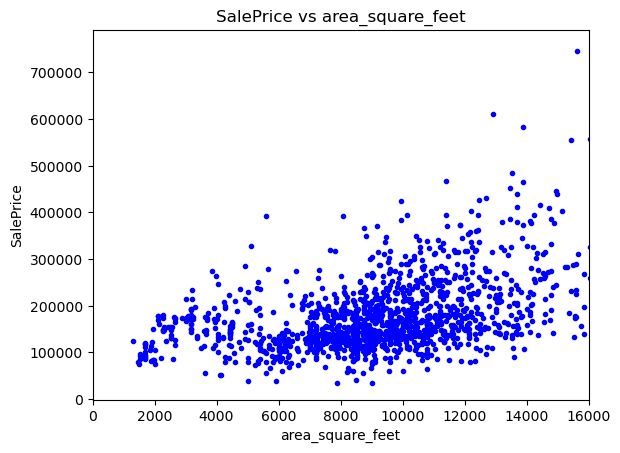

In [53]:
plt.plot(data_train['Area in square feet'], data_train['SalePrice'], 'b.')
plt.xlim(0, 16000)
plt.xlabel('area_square_feet')
plt.ylabel('SalePrice')
plt.title('SalePrice vs area_square_feet')
plt.show()

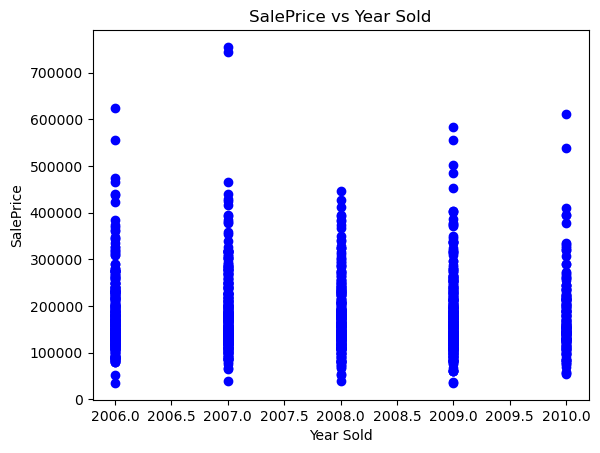

In [54]:
plt.plot(data_train['Year Sold'], data_train['SalePrice'], 'o', color='blue')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Year Sold')
plt.show()

Build the model with new column name

In [75]:
feature_to_test = ["Id", "Year Sold", "Garage Area", "Area in square feet", "Flatness of the property",
        "Original construction date", "Type of foundation",  "Overall material and finish quality",
        "Overall condition rating", "Type of road access", "Home functionality rating",
        "Bedrooms above ground (does NOT include basement bedrooms)"]

X = data_train[feature_to_test]

Spliting data to validation and training sets

In [76]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=10)

854     170000
381     187750
816     137000
577     164500
35      309000
         ...  
708     179540
1404    105000
151     372402
1184    186700
514      96500
Name: SalePrice, Length: 365, dtype: int64

In [77]:
train_X

Id  Year Sold  Garage Area  Area in square feet  \
567    568       2010          532                10171   
1416  1417       2010          560                11340   
1372  1373       2006          583                 9750   
172    173       2006          504                 5306   
810    811       2006          484                10140   
...    ...        ...          ...                  ...   
1393  1394       2008          672                10800   
1344  1345       2007          440                11103   
527    528       2008          858                14948   
1149  1150       2009          324                 9000   
1289  1290       2006          753                11065   

      Flatness of the property  Original construction date  \
567                          1                        2004   
1416                         1                        1885   
1372                         1                        1998   
172                          1                        1987   
810                          1                        1974   
...                        ...                         ...   
1393                         1                        1905   
1344                         1                        2006   
527                          1                        2008   
1149                         1                        1920   
1289                         1                        2006   

      Type of foundation  Overall material and finish quality  \
567                    1                                    7   
1416                   1                                    4   
1372                   1                                    7   
172                    1                                    7   
810                    2                                    6   
...                  ...                                  ...   
1393                   3                                    6   
1344                   1                                    7   
527                    1                                    9   
1149                   1                                    7   
1289                   1                                    8   

      Overall condition rating  Type of road access  \
567                          5                    1   
1416                         6                    1   
1372                         6                    1   
172                          7                    1   
810                          6                    1   
...                        ...                  ...   
1393                         7                    1   
1344                         5                    1   
527                          5                    1   
1149                         9                    1   
1289                         5                    1   

      Home functionality rating  \
567                           1   
1416                          1   
1372                          1   
172                           1   
810                           1   
...                         ...   
1393                          1   
1344                          1   
527                           1   
1149                          1   
1289                          1   

      Bedrooms above ground (does NOT include basement bedrooms)  
567                                                   3           
1416                                                  4           
1372                                                  3           
172                                                   2           
810                                                   3           
...                                                 ...           
1393                                                  3           
1344                                                  3           
527                                                   3           
1149                 

Build The model 

In [78]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [79]:
prediction = model.predict(val_X)

print(mean_squared_error(prediction, val_y))

1348545638.8633647


In [80]:
gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
gradient_model.fit(train_X, train_y)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [81]:
gradient_prediction = gradient_model.predict(val_X)

print(mean_squared_error(gradient_prediction, val_y))

1484459859.9730375


array([156824.13772287, 200965.55676743, 129857.50073257, 145847.45489696,
       291115.48241523, 309447.44287089, 245630.64297018, 141454.97256316,
       186773.0898624 , 165274.51177951, 149186.74679925, 164728.29535092,
       294852.05238455, 104743.12419545, 201640.29609254, 146814.93772836,
       339363.01427147, 156105.00206139, 231438.17606516, 196479.60784174,
       392463.07217975, 108485.09344418, 124382.90441805, 119215.13297135,
       180843.63118726, 153389.6869491 , 146552.20695169, 130056.06846057,
       127415.77459759, 207198.52392231, 117147.10053742, 186773.0898624 ,
       124382.90441805, 132191.0001246 , 170976.92801384,  94784.26620302,
       138080.04067787, 206126.24501823, 283776.47965396, 137553.76327566,
       241144.6940445 , 123212.83444773, 139987.03536871, 192366.02179834,
       200965.55676743, 188460.16141383, 221044.53545228, 145440.73598111,
       147050.55109713, 158620.87065981, 173771.08566579, 107467.71512885,
       164124.4484893 , 1

In [89]:
pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': prediction})

pred_csv.to_csv('submission_tree.csv', index=False)

In [90]:
pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': gradient_prediction})

pred_csv.to_csv('submission_gradient.csv', index=False)

pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': gradient_prediction})

pred_csv.to_csv('submission_gradient.csv', index=False)